## Author : Soumyajit Ghosh

##### DataScience and Business Analytics Intern December Batch at TheSparks


###### Task 1: Prediction Using Supervised Machine Learning...

Software: Jupyter Notebook...

Method: Linear Regression...


#### Linear Regression with Python Scikit Learn:


In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

#### Simple Linear Regression:


#In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Step 1: Importing Packages

In [58]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn

##### Step 2: Reading data from remote link

In [8]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Given Data imported successfully !!!")
data.head()

Given Data imported successfully !!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##### Step: 3  Plotting the distribution of scores

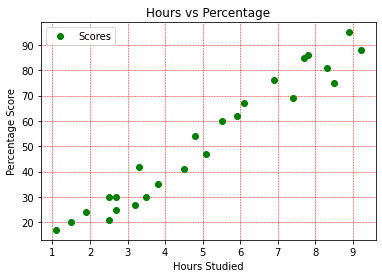

In [28]:
data.plot(x='Hours', y='Scores',c='g',alpha= 1, style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(color='r',linestyle='--', linewidth=0.5)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

##### Step 4:  Finding correlation between the variables

In [55]:
correlation = data.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We can see that there is a strong correlation between hours studied and scores received

##### Step 5: Setting training & testing set

In [60]:
training_dataset, test_dataset = sklearn.model_selection.train_test_split(data, test_size = 0.2,random_state = 2)
print("Training Set:")
training_dataset.index=range(1,21,1)
display(training_dataset)
print("Testing Set")
test_dataset.index=range(1,6,1)
display(test_dataset)

Training Set:


,Hours,Scores
1,2.7,25
2,8.5,75
3,2.5,30
4,4.5,41
5,3.8,35
6,3.5,30
7,7.7,85
8,1.5,20
9,7.4,69
10,5.1,47


Testing Set


,Hours,Scores
1,1.1,17
2,2.5,21
3,1.9,24
4,9.2,88
5,6.9,76


In [61]:
x_train = training_dataset['Hours'].to_numpy().reshape(-1,1)
y_train = training_dataset['Scores'].to_numpy().transpose().flatten()
x_test = test_dataset['Hours'].to_numpy().reshape(-1,1)
y_test = test_dataset['Scores'].to_numpy().transpose().flatten()

##### Step 6: Creating a training model

In [62]:
 model = LinearRegression().fit(x_train,y_train)

##### Step 7:  Plotting the Regression Line

In [68]:
y_new = model.intercept_ + x_train * model.coef_

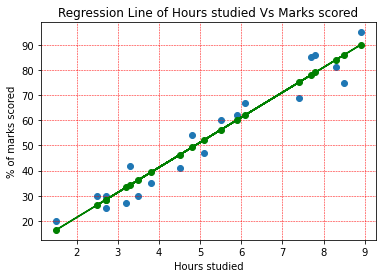

In [73]:
# Plotting for the test data
plt.title("Regression Line of Hours studied Vs Marks scored")
plt.xlabel("Hours studied")
plt.ylabel("% of marks scored")
plt.scatter(x_train, y_train)
plt.grid(color='r',linestyle='--', linewidth=0.5)
plt.plot(x_train,y_new,c='g', marker ="o",alpha=1);
plt.show()

In [74]:
R_square = model.score(x_train,y_train)
print("Coefficient of Determination or R-Square:",R_square)

Coefficient of Determination or R-Square: 0.9423348138802985


##### Step 8: Testing the Model

In [75]:
y_pred = model.predict(x_test)
comparison = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comparison.index=range(1,6,1)
comparison

,Actual,Predicted
1,17,12.442587
2,21,26.359448
3,24,20.395079
4,88,92.961570
5,76,70.098155


##### Step 9: Predicting the model

In [76]:
hours = np.array(9.25).reshape(-1,1)
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.45860055685802


##### Step 10: Evaluating the model for Error

In [78]:
from sklearn import metrics  
import math
print('Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Error:', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error: 4.877039354964483
Error: 4.938382360637604
